In [ ]:
## AHRS (Attitude and Heading Reference System) ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ahrs

In [2]:
acc = pd.read_csv('acc.csv', header=None)
acc.columns = ['time', 'ax', 'ay', 'az']

gyro = pd.read_csv('gyro.csv', header=None)
gyro.columns = ['time', 'gx', 'gy', 'gz']

mag = pd.read_csv('mag.csv', header=None)
mag.columns = ['time', 'mx', 'my', 'mz']

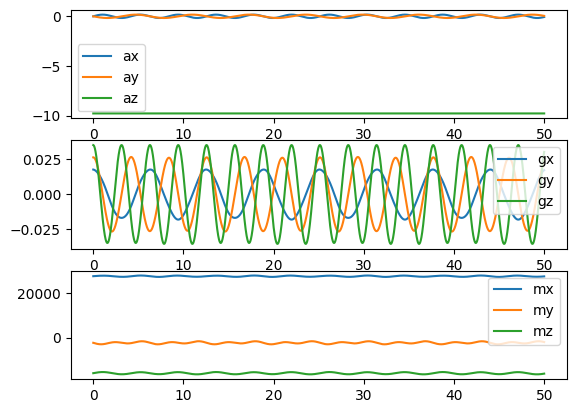

In [3]:
# plot data
plt.figure()
plt.subplot(311)
plt.plot(acc['time'], acc['ax'], label='ax')
plt.plot(acc['time'], acc['ay'], label='ay')
plt.plot(acc['time'], acc['az'], label='az')
plt.legend()
plt.subplot(312)
plt.plot(gyro['time'], gyro['gx'], label='gx')
plt.plot(gyro['time'], gyro['gy'], label='gy')
plt.plot(gyro['time'], gyro['gz'], label='gz')
plt.legend()
plt.subplot(313)
plt.plot(mag['time'], mag['mx'], label='mx')
plt.plot(mag['time'], mag['my'], label='my')
plt.plot(mag['time'], mag['mz'], label='mz')
plt.legend()
plt.show()


Madgwick: Roll: -0.03 | Pitch: 0.02 | Yaw: 5.60
Madgwick: Roll: -0.06 | Pitch: 0.05 | Yaw: 11.19
Madgwick: Roll: -0.09 | Pitch: 0.07 | Yaw: 16.78
Madgwick: Roll: -0.12 | Pitch: 0.11 | Yaw: 22.36
Madgwick: Roll: -0.15 | Pitch: 0.14 | Yaw: 27.95
Madgwick: Roll: -0.17 | Pitch: 0.17 | Yaw: 33.53
Madgwick: Roll: -0.19 | Pitch: 0.21 | Yaw: 39.12
Madgwick: Roll: -0.21 | Pitch: 0.25 | Yaw: 44.70
Madgwick: Roll: -0.23 | Pitch: 0.29 | Yaw: 50.28
Madgwick: Roll: -0.24 | Pitch: 0.33 | Yaw: 55.86
Madgwick: Roll: -0.25 | Pitch: 0.38 | Yaw: 61.44
Madgwick: Roll: -0.25 | Pitch: 0.42 | Yaw: 67.03
Madgwick: Roll: -0.25 | Pitch: 0.47 | Yaw: 72.61
Madgwick: Roll: -0.25 | Pitch: 0.51 | Yaw: 78.19
Madgwick: Roll: -0.24 | Pitch: 0.56 | Yaw: 83.78
Madgwick: Roll: -0.23 | Pitch: 0.60 | Yaw: 89.36
Madgwick: Roll: -0.21 | Pitch: 0.64 | Yaw: 94.95
Madgwick: Roll: -0.19 | Pitch: 0.68 | Yaw: 100.54
Madgwick: Roll: -0.17 | Pitch: 0.72 | Yaw: 106.13
Madgwick: Roll: -0.14 | Pitch: 0.76 | Yaw: 111.72
Madgwick: Roll: -0

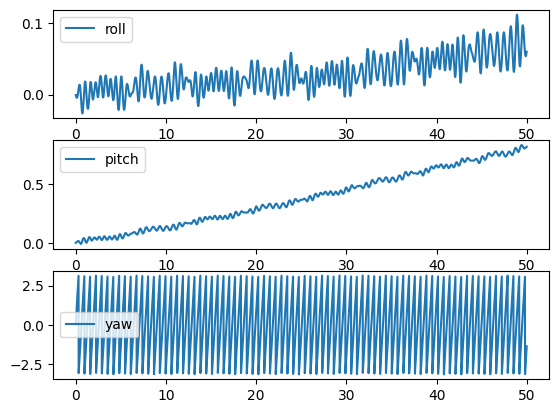

In [32]:
from ahrs.filters import madgwick
from ahrs.common.orientation import acc2q

# Madgwick's algorithm
# AHRS algorithm object
madgwick = madgwick.Madgwick()

# Initialize quaternion
q = np.array([1., 0., 0., 0.])
roll_array = []
pitch_array = []
yaw_array = []
# For each measurement
for i in range(acc.shape[0]):
    # Update AHRS filter
    q = madgwick.updateMARG(q, acc.iloc[i,1:].values, gyro.iloc[i,1:].values, mag.iloc[i,1:].values)
    # Convert quaternion to Euler angles
    roll, pitch, yaw = ahrs.common.orientation.q2euler(q)
    roll_array.append(roll)
    pitch_array.append(pitch)
    yaw_array.append(yaw)
    # Print Euler angles in degrees
    print("Madgwick: Roll: {0:0.2f} | Pitch: {1:0.2f} | Yaw: {2:0.2f}".format(np.degrees(roll), np.degrees(pitch), np.degrees(yaw)))

# plot data
plt.figure()
plt.subplot(311)
plt.plot(acc['time'], roll_array, label='roll')
plt.legend()
plt.subplot(312)
plt.plot(acc['time'], pitch_array, label='pitch')
plt.legend()
plt.subplot(313)
plt.plot(acc['time'], yaw_array, label='yaw')
plt.legend()
plt.show()

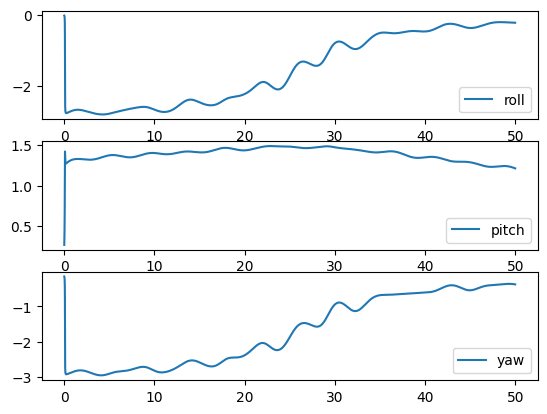

In [29]:

# Extended Kalman Filter
from ahrs.filters import EKF
# AHRS algorithm object
ekf = EKF(gyr=gyro.iloc[:,1:].values, acc=acc.iloc[:,1:].values, mag=mag.iloc[:,1:].values, frequency=100.0)
from ahrs.common.orientation import q2euler
roll = np.zeros(acc.shape[0])
pitch = np.zeros(acc.shape[0])
yaw = np.zeros(acc.shape[0])
for t in range(acc.shape[0]):
    roll[t], pitch[t], yaw[t] = q2euler(ekf.Q[t])


# plot data
plt.figure()
plt.subplot(311)
plt.plot(acc['time'], roll_array, label='roll')
plt.legend()
plt.subplot(312)
plt.plot(acc['time'], pitch_array, label='pitch')
plt.legend()
plt.subplot(313)
plt.plot(acc['time'], yaw_array, label='yaw')
plt.legend()
plt.show()




Mahony: Roll: -0.46 | Pitch: -0.34 | Yaw: 5.65
Mahony: Roll: -0.92 | Pitch: -0.64 | Yaw: 11.35
Mahony: Roll: -1.37 | Pitch: -0.90 | Yaw: 17.10
Mahony: Roll: -1.81 | Pitch: -1.11 | Yaw: 22.91
Mahony: Roll: -2.24 | Pitch: -1.27 | Yaw: 28.76
Mahony: Roll: -2.65 | Pitch: -1.39 | Yaw: 34.66
Mahony: Roll: -3.03 | Pitch: -1.47 | Yaw: 40.59
Mahony: Roll: -3.40 | Pitch: -1.51 | Yaw: 46.56
Mahony: Roll: -3.73 | Pitch: -1.50 | Yaw: 52.57
Mahony: Roll: -4.02 | Pitch: -1.46 | Yaw: 58.60
Mahony: Roll: -4.28 | Pitch: -1.38 | Yaw: 64.65
Mahony: Roll: -4.49 | Pitch: -1.27 | Yaw: 70.72
Mahony: Roll: -4.66 | Pitch: -1.13 | Yaw: 76.80
Mahony: Roll: -4.78 | Pitch: -0.97 | Yaw: 82.89
Mahony: Roll: -4.84 | Pitch: -0.80 | Yaw: 88.98
Mahony: Roll: -4.85 | Pitch: -0.62 | Yaw: 95.07
Mahony: Roll: -4.80 | Pitch: -0.44 | Yaw: 101.15
Mahony: Roll: -4.70 | Pitch: -0.26 | Yaw: 107.23
Mahony: Roll: -4.55 | Pitch: -0.10 | Yaw: 113.28
Mahony: Roll: -4.34 | Pitch: 0.05 | Yaw: 119.32
Mahony: Roll: -4.07 | Pitch: 0.17 | Ya

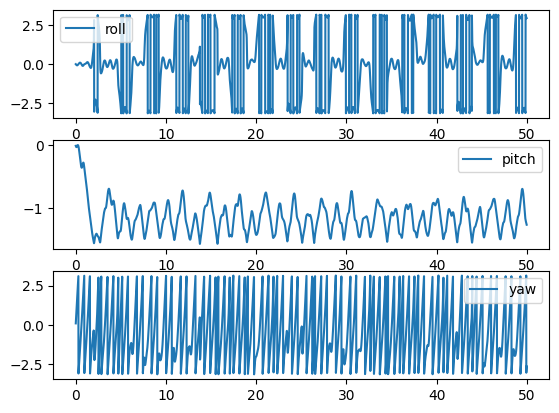

In [30]:
# mahony filter
from ahrs.filters import mahony
# AHRS algorithm object
mahony = mahony.Mahony()
# Initialize quaternion
q = np.array([1., 0., 0., 0.])
roll_array = []
pitch_array = []
yaw_array = []
# For each measurement
for i in range(acc.shape[0]):
    # Update AHRS filter frecuency 100Hz
    q = mahony.updateMARG(q, acc.iloc[i,1:].values, gyro.iloc[i,1:].values, mag.iloc[i,1:].values)
    # Convert quaternion to Euler angles
    roll, pitch, yaw = ahrs.common.orientation.q2euler(q)
    roll_array.append(roll)
    pitch_array.append(pitch)
    yaw_array.append(yaw)
    # Print Euler angles in degrees
    print("Mahony: Roll: {0:0.2f} | Pitch: {1:0.2f} | Yaw: {2:0.2f}".format(np.degrees(roll), np.degrees(pitch), np.degrees(yaw)))

# plot data
plt.figure()
plt.subplot(311)
plt.plot(acc['time'], roll_array, label='roll')
plt.legend()
plt.subplot(312)
plt.plot(acc['time'], pitch_array, label='pitch')
plt.legend()
plt.subplot(313)
plt.plot(acc['time'], yaw_array, label='yaw')
plt.legend()
plt.show()
